In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import geocoder
import gmaps
import statsmodels.api as sm

import pytz

import psycopg2

from sklearn.linear_model import Ridge

import spacy

import swifter

import requests

In [16]:
# Plot settings
%pylab inline

figsize(15, 9)

import matplotlib.style as style

style.use('childsafeai')

Populating the interactive namespace from numpy and matplotlib


In [17]:
from local_settings import GOOGLE_API_KEY

gmaps.configure(GOOGLE_API_KEY)

# Cases

In [18]:
from io import StringIO

download_counties = requests.get("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")

cases_by_county = pd.read_csv(StringIO(download_counties.content.decode('utf-8')))

In [19]:
cases_by_county['date'] = pd.to_datetime(cases_by_county['date'])

In [20]:
cases_by_county.groupby('date')['deaths'].sum()

date
2020-01-21       0
2020-01-22       0
2020-01-23       0
2020-01-24       0
2020-01-25       0
              ... 
2020-03-31    3631
2020-04-01    4549
2020-04-02    5496
2020-04-03    7135
2020-04-04    8505
Name: deaths, Length: 75, dtype: int64

In [29]:
cases_by_county

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0
...,...,...,...,...,...,...
33246,2020-04-04,Sublette,Wyoming,56035.0,1,0
33247,2020-04-04,Sweetwater,Wyoming,56037.0,4,0
33248,2020-04-04,Teton,Wyoming,56039.0,36,0
33249,2020-04-04,Uinta,Wyoming,56041.0,2,0


In [22]:
cases_by_borough = cases_by_county[(cases_by_county['state'] == "New York") & (cases_by_county['county'].isin(['New York', 'Kings', 'Queens', 'Bronx', 'Richmond']))]

In [23]:
cases_by_borough

,date,county,state,fips,cases,deaths
32240,2020-04-04,Bronx,New York,36005.0,0,0
32261,2020-04-04,Kings,New York,36047.0,0,0
32278,2020-04-04,Queens,New York,36081.0,0,0
32280,2020-04-04,Richmond,New York,36085.0,0,0


In [24]:
cases_new_york = cases_by_county[cases_by_county['county'] == "New York City"]

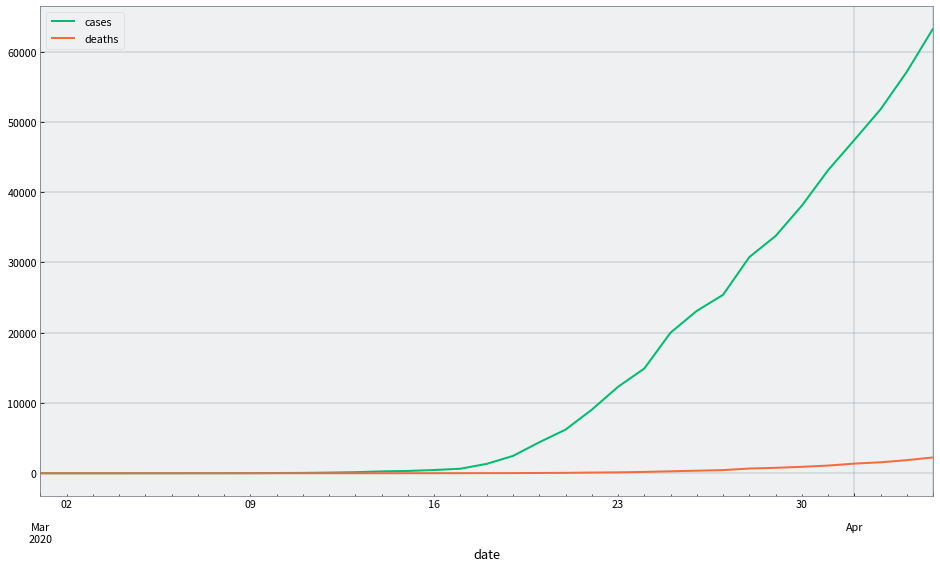

In [25]:
cases_new_york.groupby('date')[['cases', 'deaths']].sum().resample('D').sum().plot(kind='line')

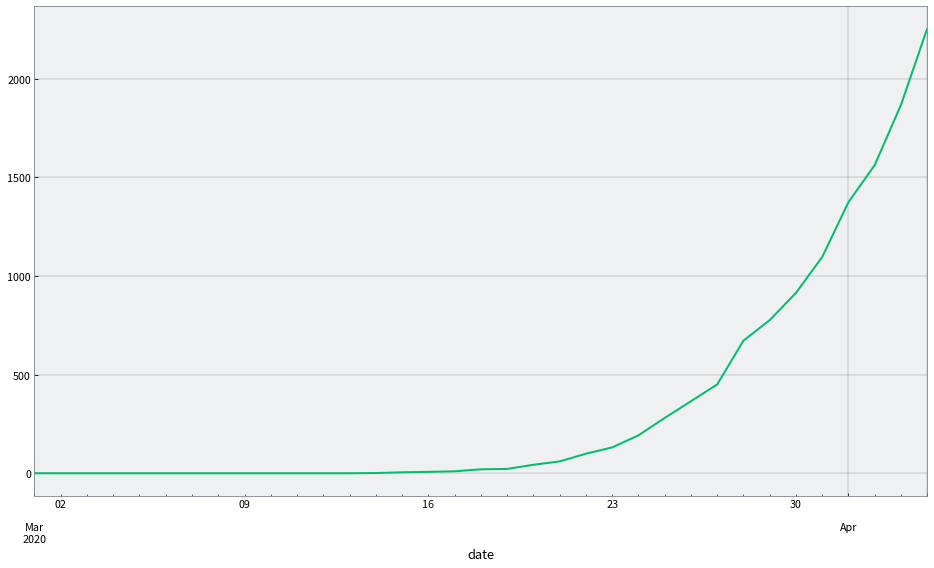

In [31]:
cases_new_york.groupby('date')['deaths'].sum().resample('D').sum().plot(kind='line')

In [27]:
cases_new_york['deaths'].max()

2254

In [30]:
cases_new_york['deaths'].sum() / cases_new_york['cases'].sum()

0.025062193270595678